In [54]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Cargar los datos

In [56]:
# Cargar el archivo csv a un DataFrame
listings_df = pd.read_csv("./data/listings.csv.gz")

In [57]:
# Ver duplicados de la columna id
listings_df["id"].duplicated().sum()

0

In [58]:
# Ver duplicados totales en el DataFrame, todas las columnas excepto id
listings_df.duplicated(subset=listings_df.columns.difference(["id"])).sum()

0

In [59]:
# Mostrar las dimensiones del DataFrame
listings_df.shape

(12246, 75)

In [60]:
# Mostrar los tipos de datos de las columnas
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [61]:
listings_df.dtypes.groupby(listings_df.dtypes).size()

int64      23
float64    17
object     35
dtype: int64

In [62]:
listings_df.sample(5) # Muestra 5 filas aleatorias

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1090,5769150,https://www.airbnb.com/rooms/5769150,20240622024458,2024-06-22,city scrape,Serragli TERRACE with 360' views!,Beautiful one bedroom with magnificent terrace...,NaN,https://a0.muscache.com/pictures/71809388/8d69...,4156491,https://www.airbnb.com/users/show/4156491,Apartments Florence,2012-11-15,"Florence, Italy",We manage more than 400 exceptionally well loc...,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/e5def...,https://a0.muscache.com/im/pictures/user/e5def...,Santa Croce,111,168,"['email', 'phone', 'work_email']",t,t,NaN,Centro Storico,NaN,43.76785,11.24585,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Essentials"", ""Kitchen"", ""Hot water"", ""Dishwa...",$268.00,3,365,3,3,365,365,3.0,365.0,NaN,t,0,0,0,0,2024-06-22,50,0,0,2015-05-08,2021-08-27,4.62,4.86,4.58,4.59,4.72,4.82,4.71,048017LTN3957,t,79,79,0,0,0.45
6203,554781350921123252,https://www.airbnb.com/rooms/554781350921123252,20240622024458,2024-06-22,city scrape,Capponi Place,Capponi Place is an apartment located in the h...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,23904874,https://www.airbnb.com/users/show/23904874,Edoardo E Michela,2014-11-18,"Florence, Italy","Siamo Edoardo e Michela, da anni accogliamo tu...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/19d0e...,https://a0.muscache.com/im/pictures/user/19d0e...,Santa Croce,421,444,"['email', 'phone', 'work_email']",t,t,NaN,Centro Storico,NaN,43.77753,11.26279,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Essentials"", ""Dining table"", ""Washer"", ""Kitc...",$115.00,30,365,1,30,365,365,29.3,365.0,NaN,t,0,0,0,179,2024-06-22,1,0,0,2022-05-05,2022-05-05,2.00,1.00,4.00,2.00,3.00,4.00,3.00,NaN,t,251,251,0,0,0.04
3583,29454732,https://www.airbnb.com/rooms/29454732,20240622024458,2024-06-22,city scrape,CAMERA MATRIMONIALE CON BAGNO PRIVATO,"The room is large, bright with private bathroo...","My neighborhood ""Bellariva"" is one of the best...",https://a0.muscache.com/pictures/2109a731-a844...,7494287,https://www.airbnb.com/users/show/7494287,Deborah,2013-07-15,"Florence, Italy",Sono una insegnante di inglese ed italiano.\nA...,NaN,NaN,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Campo di Marte,1,2,"['email', 'phone']",t,t,"Florence, Toscana, Italy",Campo di Marte,NaN,43.76756,11.28370,Private room in rental unit,Private room,1,1.0,1 private bath,1.0,1.0,"[""Essentials"", ""Room-darkening shades"", ""Cloth...",$90.00,2,1125,1,2,1125,1125,1.1,1125.0,NaN,t,23,53,71,346,2024-06-22,33,18,0,2022-06-12,2024-03-07,4.85,4.79,4.85,4.82,4.91,4.70,4.55,NaN,t,1,0,1,0,1.33
7010,6

## Entendimiento inicial de datos

### Dimensiones del Dataset
- Número de registros: 12,246
- Número de columnas: 75


### Tipos de Datos
En los tipos de datos identificados por pandas podemos observar que la mayoría de las columnas son de tipo object, seguido de int64 y float64. En las columnas de tipo object se encuentran algunas variables categoricas, texto, fechas y moneda tal y como se puede observar en la siguiente tabla obtenida del diccionario de datos.

| **Columna**                              | **Tipo de Dato**                       |
|------------------------------------------|----------------------------------------|
| id                                       | integer                                |
| listing_url                              | text                                   |
| scrape_id                                | bigint                                 |
| last_scraped                             | datetime                               |
| source                                   | text                                   |
| name                                     | text                                   |
| description                              | text                                   |
| neighborhood_overview                    | text                                   |
| picture_url                              | text                                   |
| host_id                                  | integer                                |
| host_url                                 | text                                   |
| host_name                                | text                                   |
| host_since                               | date                                   |
| host_location                            | text                                   |
| host_about                               | text                                   |
| host_response_time                       | text                                   |
| host_response_rate                       | text                                   |
| host_acceptance_rate                     | text                                   |
| host_is_superhost                        | boolean [t=true; f=false]              |
| host_thumbnail_url                       | text                                   |
| host_picture_url                         | text                                   |
| host_neighbourhood                       | text                                   |
| host_listings_count                      | integer                                |
| host_total_listings_count                | integer                                |
| host_verifications                       | text                                   |
| host_has_profile_pic                     | boolean [t=true; f=false]              |
| host_identity_verified                   | boolean [t=true; f=false]              |
| neighbourhood                            | text                                   |
| neighbourhood_cleansed                   | text                                   |
| neighbourhood_group_cleansed             | text                                   |
| latitude                                 | numeric                                |
| longitude                                | numeric                                |
| property_type                            | text                                   |
| room_type                                | text                                   |
| accommodates                             | integer                                |
| bathrooms                                | numeric                                |
| bathrooms_text                           | string                                 |
| bedrooms                                 | integer                                |
| beds                                     | integer                                |
| amenities                                | json                                   |
| price                                    | currency                               |
| minimum_nights                           | integer                                |
| maximum_nights                           | integer                                |
| minimum_minimum_nights                   | integer                                |
| maximum_minimum_nights                   | integer                                |
| minimum_maximum_nights                   | integer                                |
| maximum_maximum_nights                   | integer                                |
| minimum_nights_avg_ntm                   | numeric                                |
| maximum_nights_avg_ntm                   | numeric                                |
| calendar_updated                         | date                                   |
| has_availability                         | boolean                                |
| availability_30                          | integer                                |
| availability_60                          | integer                                |
| availability_90                          | integer                                |
| availability_365                         | integer                                |
| calendar_last_scraped                    | date                                   |
| number_of_reviews                        | integer                                |
| number_of_reviews_ltm                    | integer                                |
| number_of_reviews_l30d                   | integer                                |
| first_review                             | date                                   |
| last_review                              | date                                   |
| review_scores_rating                     | numeric                                |
| review_scores_accuracy                   | numeric                                |
| review_scores_cleanliness                | numeric                                |
| review_scores_checkin                    | numeric                                |
| review_scores_communication              | numeric                                |
| review_scores_location                   | numeric                                |
| review_scores_value                      | numeric                                |
| license                                  | text                                   |
| instant_bookable                         | boolean                                |
| calculated_host_listings_count           | integer                                |
| calculated_host_listings_count_entire_homes | integer                            |
| calculated_host_listings_count_private_rooms | integer                            |
| calculated_host_listings_count_shared_rooms | integer                            |
| reviews_per_month                        | numeric                                |

Para el top 5 de atributos más importantes se eligió:

- Price (precio por noche): El analisis de este atributo es importante para entender la distribución de precios y establecer precios competitivos que atraigan clientes y brinden mayor rentabilidad.
- neighbourhood_cleansed (Barrio): Este atributo es importante para identificar áreas más rentables y con mayor demanda.
- review_scores_rating (Calificación general de opiniones): Debemos analizar este atributo para entender la opinión de los clientes con respecto a los otros atributos que pueden brindar información sobre las mejores características de una propiedad.
- room_type (Tipo de propiedad): Este atributo es importante para entender la distribución de los tipos de propiedades estableciendo los tipos de propiedades más rentables y los precios a los que se pueden ofrecer.
- number_of_reviews (Número de reseñas): Es útil para analizar la relación entre popularidad, ocupación y rentabilidad.

### Análisis del precio por noche

In [63]:
# Transformar el precio a un valor numérico
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [64]:
# Estadisticas descriptivas de la columna price_float
listings_df["price_float"].describe()

count    11847.000000
mean       225.080864
std        431.320006
min         10.000000
25%        107.000000
50%        150.000000
75%        232.000000
max      20000.000000
Name: price_float, dtype: float64

[]

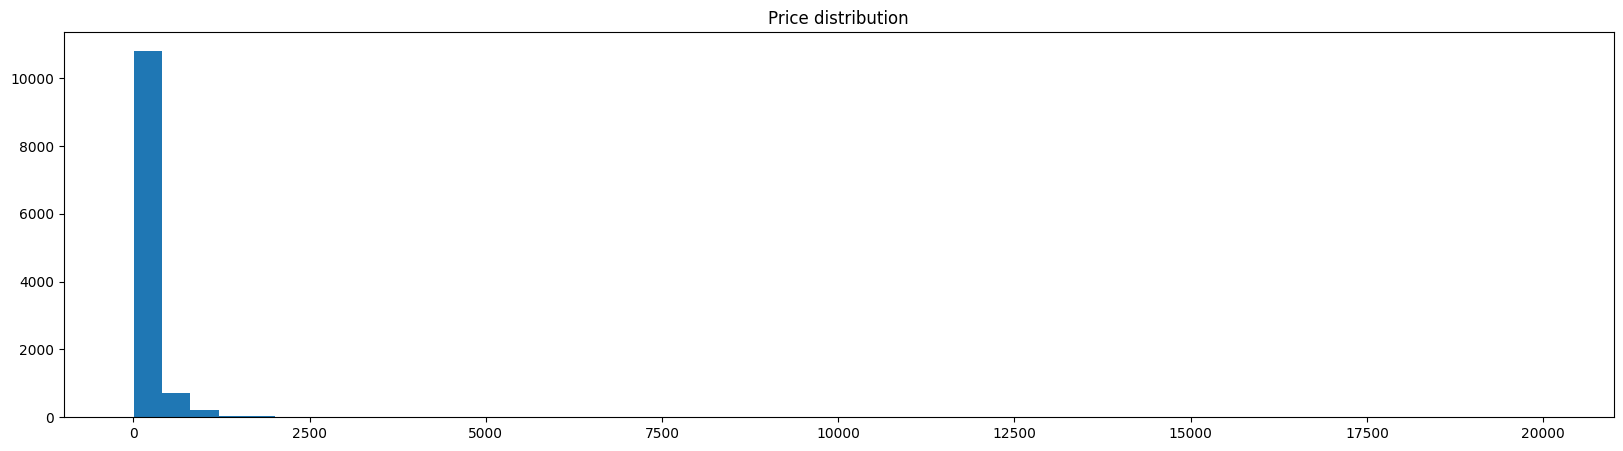

In [65]:
# Crear un histograma de la columna price_float
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

Al hacer la visualización sin aplicar ninguna transformación a los datos, se puede observar que tenemos un oulier que afecta la visualización de los datos. Por lo que se aplica el rango intercuartilico.

In [66]:
# Rango intercuartílico
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

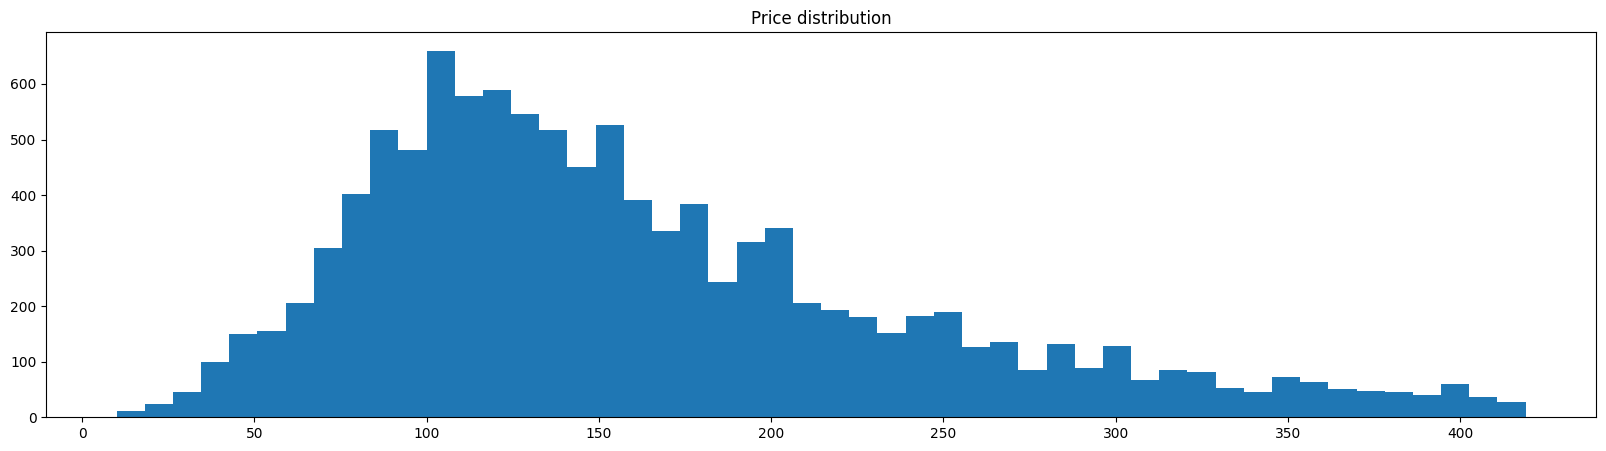

In [67]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

[]

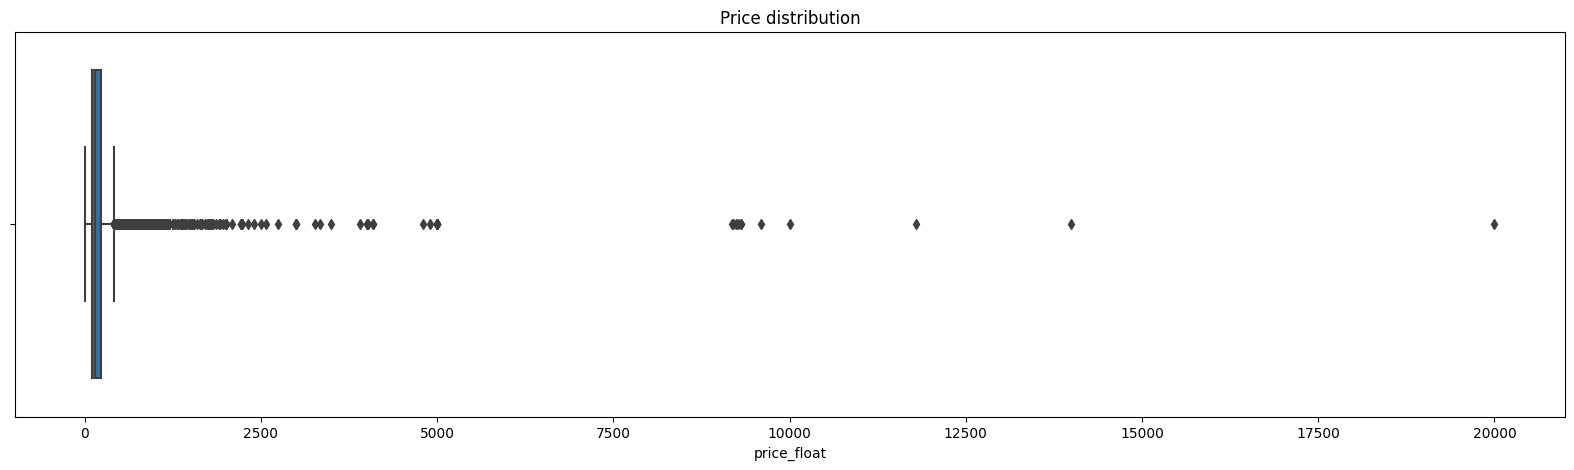

In [68]:
# Diagrama de caja de la columna price_float
plt.figure(figsize=(20, 5))
sns.boxplot(x=listings_df["price_float"])
plt.title("Price distribution")
plt.plot()


En el caso de las propiedades en Florence-Toscana-Italy, la distribución de precios está sesgada a la derecha, con la mayoría de los valores concentrados en el rango bajo y algunos precios significativamente más altos.

### Análisis de los barrios 

In [69]:
# Mostrar cantidad de propiedades por barrio
listings_df["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Centro Storico       8971
Campo di Marte       1287
Rifredi              1007
Isolotto Legnaia      524
Gavinana Galluzzo     457
Name: count, dtype: int64

[]

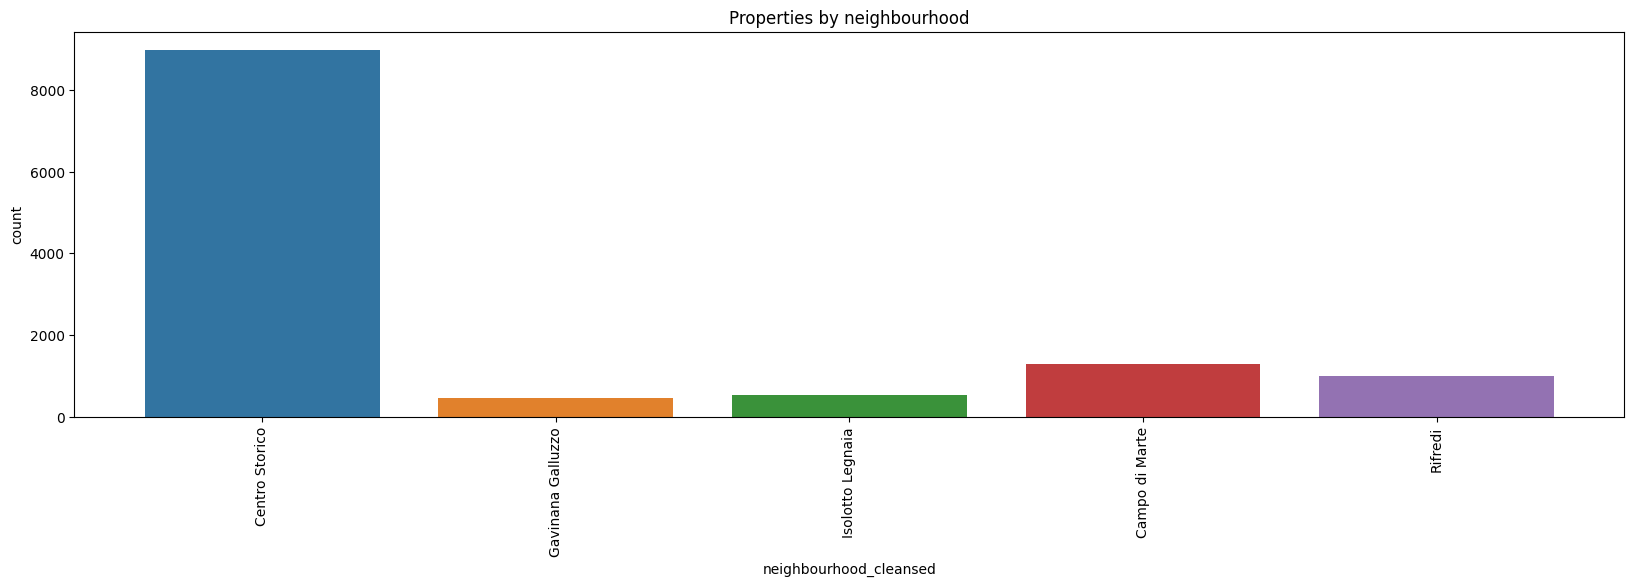

In [70]:
# Mostrar en gráfico de barras la cantidad de propiedades por barrio
plt.figure(figsize=(20, 5))
sns.countplot(x=listings_df["neighbourhood_cleansed"])
plt.xticks(rotation=90)
plt.title("Properties by neighbourhood")
plt.plot()


El mayor número de propiedades se encuentra en el barrio de Centro Storico, seguido de Rifredi y Campo di Marte.

### Análisis de la calificación general de opiniones

In [71]:
# Estadisticas descriptivas de la columna review_scores_rating
listings_df["review_scores_rating"].describe()

count    10818.000000
mean         4.731913
std          0.351111
min          1.000000
25%          4.640000
50%          4.830000
75%          4.950000
max          5.000000
Name: review_scores_rating, dtype: float64

[]

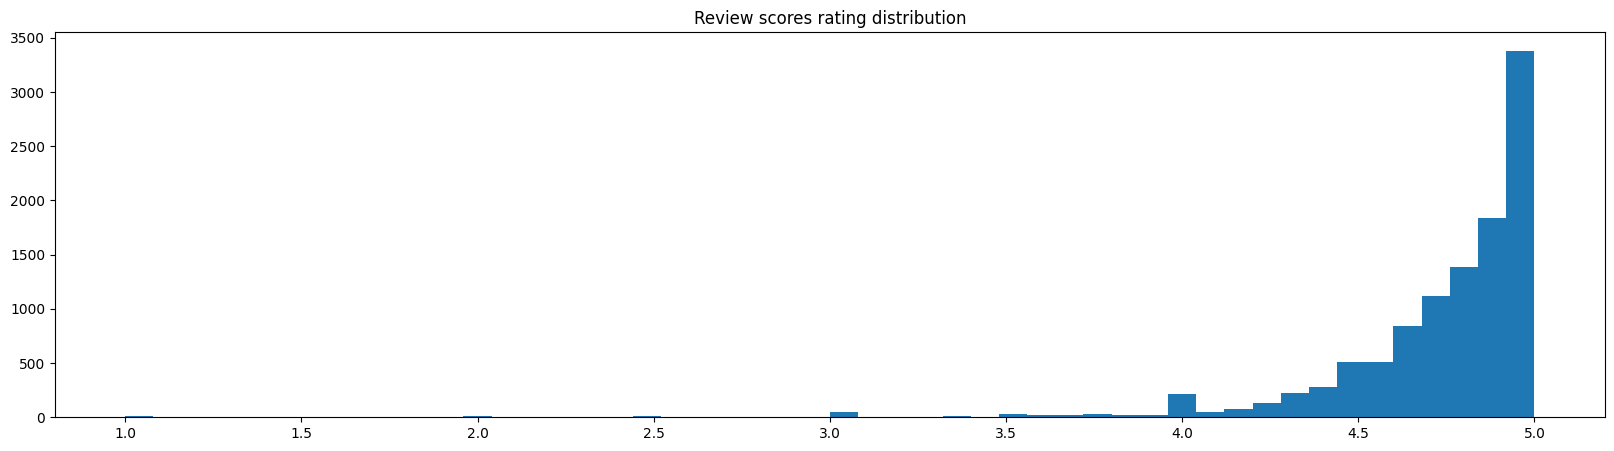

In [72]:
# Crear un histograma de la columna review_scores_rating
plt.figure(figsize=(20, 5))
plt.hist(listings_df["review_scores_rating"].dropna(), bins=50)
plt.title("Review scores rating distribution")
plt.plot()

In [73]:
# Rango intercuartílico
q1 = listings_df["review_scores_rating"].quantile(0.25)
q3 = listings_df["review_scores_rating"].quantile(0.75)
iqr = q3 - q1

[]

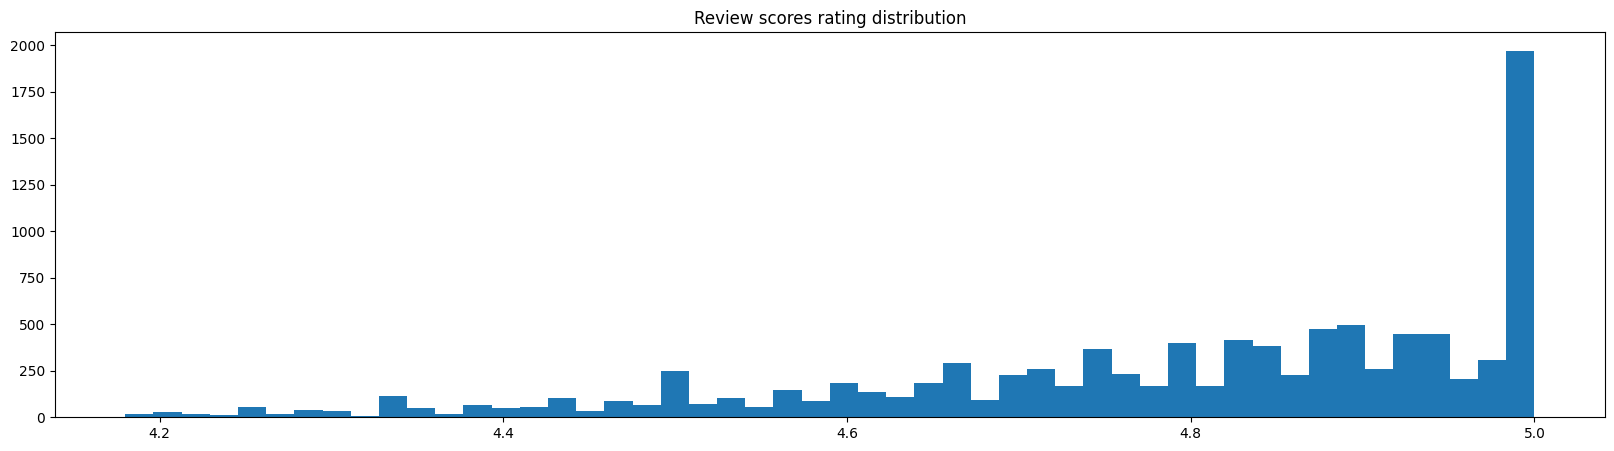

In [74]:
# Crear un histograma de la columna review_scores_rating sin outliers
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["review_scores_rating"].between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)]["review_scores_rating"].dropna(), bins=50)
plt.title("Review scores rating distribution")
plt.plot()

[]

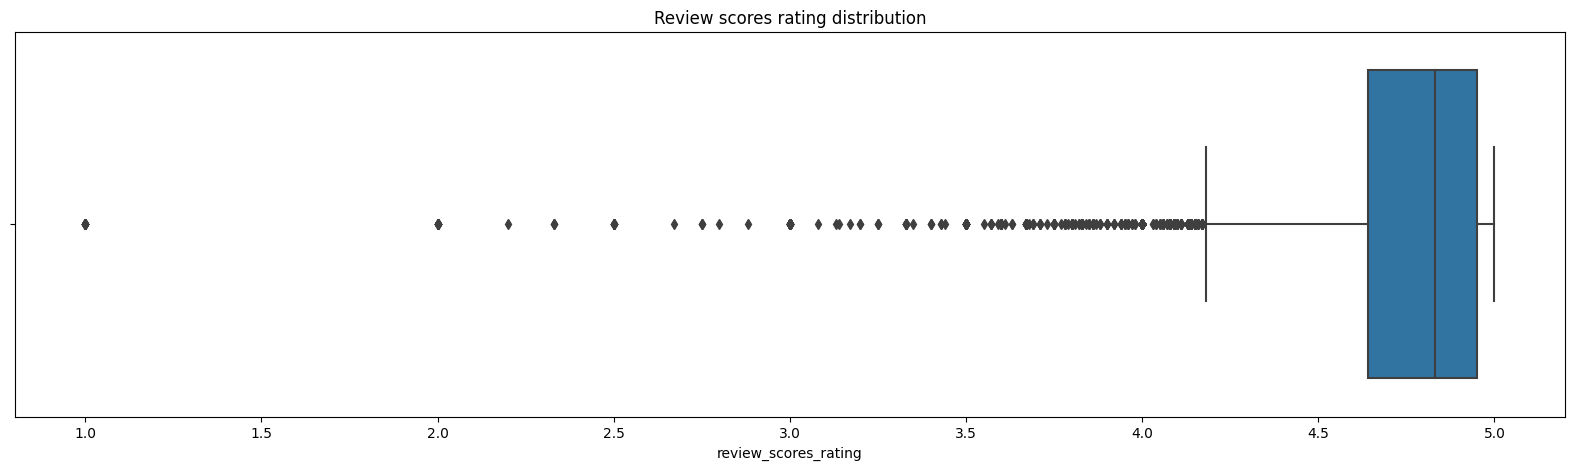

In [75]:
# Diagrama de caja de la columna review_scores_rating
plt.figure(figsize=(20, 5))
sns.boxplot(x=listings_df["review_scores_rating"])
plt.title("Review scores rating distribution")
plt.plot()

La variable review_scores_rating muestra una distribución sesgada hacia la izquierda, lo que indica que la mayoría de las propiedades tienen puntuaciones altas, con pocos valores más bajos dispersos hacia la izquierda. Al aplicar el rango intercuartílico a review_scores_rating, se observa que las reseñas son superiores a 4, lo que indica que la mayoría de las propiedades reciben valoraciones muy positivas.

### Análisis del tipo de propiedad

In [76]:
# Mostrar cantidad de propiedades por tipo de propiedad
listings_df["room_type"].value_counts()

room_type
Entire home/apt    10180
Private room        1945
Hotel room            86
Shared room           35
Name: count, dtype: int64

[]

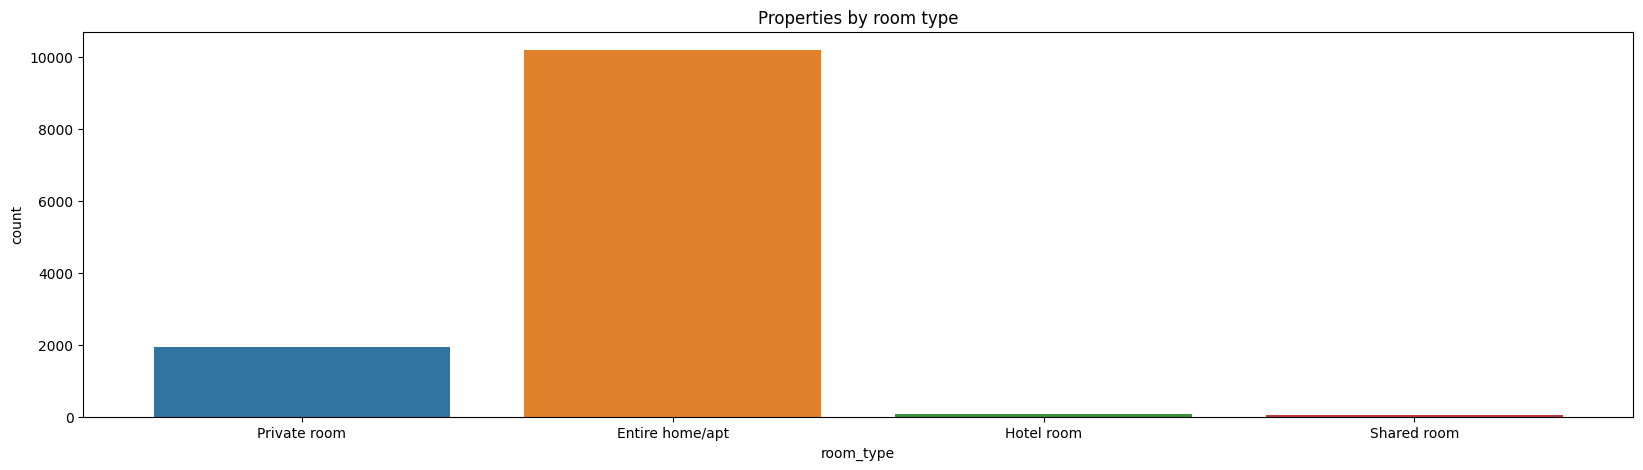

In [77]:
# Mostrar en gráfico de barras la cantidad de propiedades por tipo de propiedad
plt.figure(figsize=(20, 5))
sns.countplot(x=listings_df["room_type"])
plt.title("Properties by room type")
plt.plot()

La mayoría de las propiedades son de tipo Entire home/apt, seguido de Private room y Shared room.

### Análisis del número de reseñas

In [78]:
# Estadisticas descriptivas de la columna number_of_reviews
listings_df["number_of_reviews"].describe()

count    12246.000000
mean        67.829005
std        105.966099
min          0.000000
25%          4.000000
50%         24.000000
75%         83.000000
max       1082.000000
Name: number_of_reviews, dtype: float64

[]

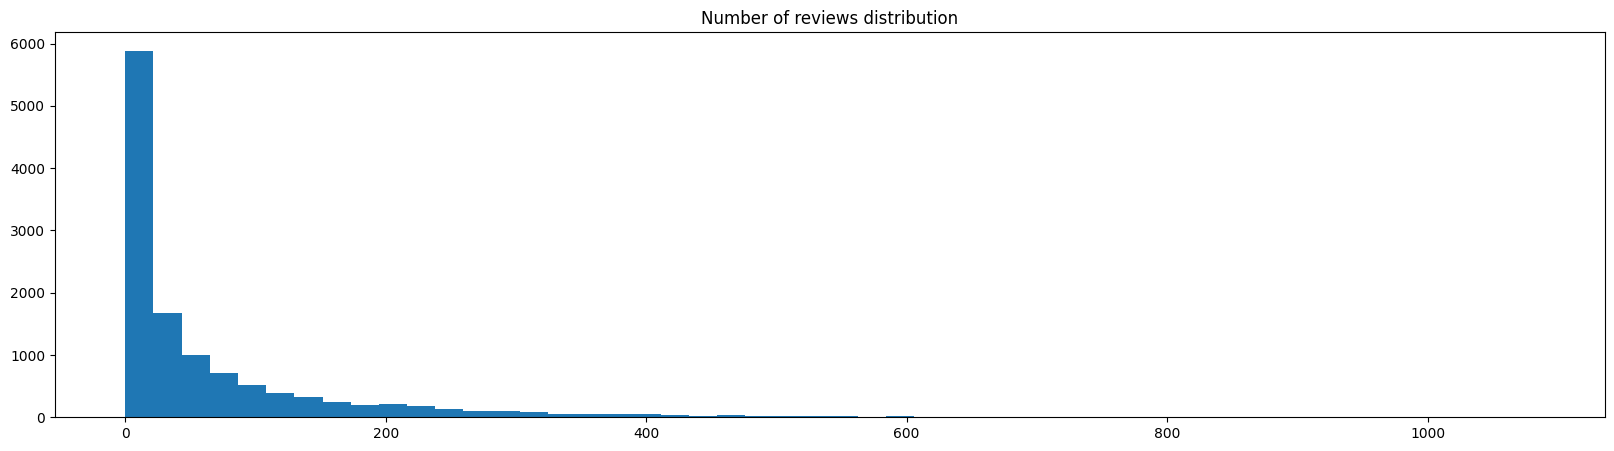

In [79]:
# Crear un histograma de la columna number_of_reviews
plt.figure(figsize=(20, 5))
plt.hist(listings_df["number_of_reviews"], bins=50)
plt.title("Number of reviews distribution")
plt.plot()

In [80]:
# Rango intercuartílico
q1 = listings_df["number_of_reviews"].quantile(0.25)
q3 = listings_df["number_of_reviews"].quantile(0.75)
iqr = q3 - q1

[]

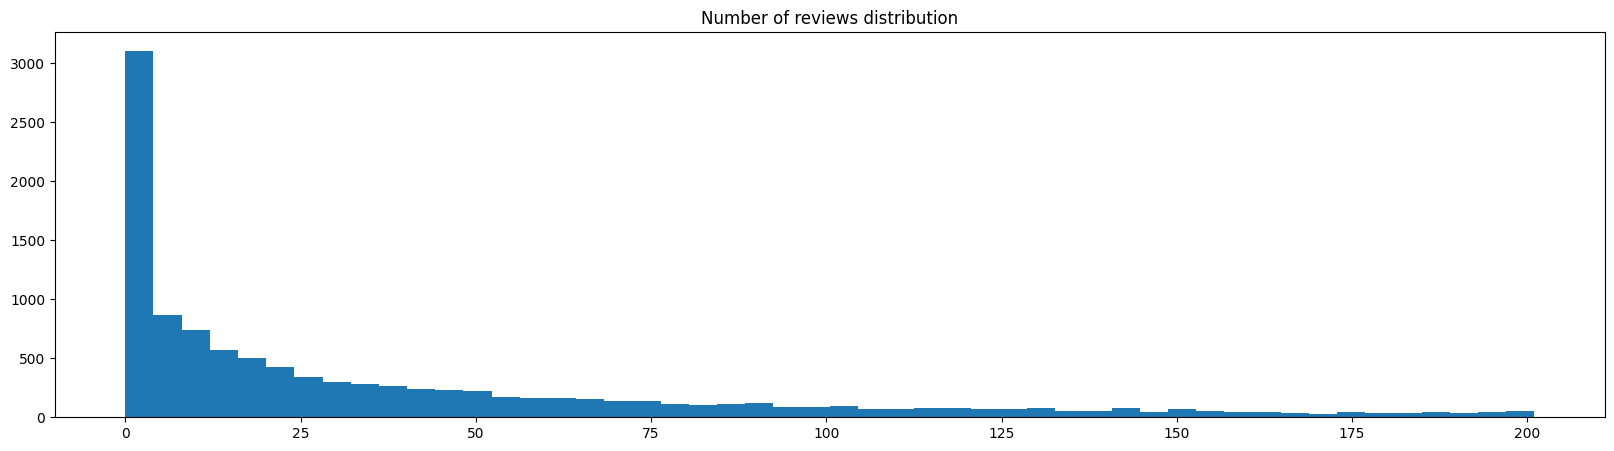

In [81]:
# Crear un histograma de la columna number_of_reviews sin outliers
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["number_of_reviews"].between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)]["number_of_reviews"], bins=50)
plt.title("Number of reviews distribution")
plt.plot()

[]

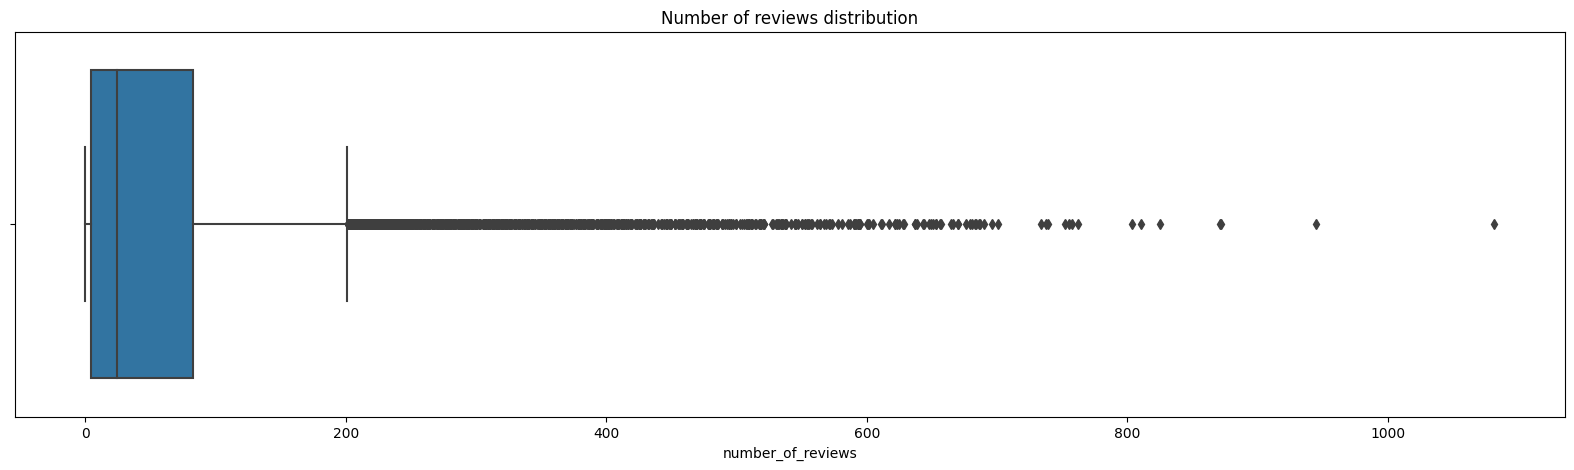

In [82]:
# Diagrama de caja de la columna number_of_reviews
plt.figure(figsize=(20, 5))
sns.boxplot(x=listings_df["number_of_reviews"])
plt.title("Number of reviews distribution")
plt.plot()

La cantidad de reseñas por propiedad es baja, lo que indica que la mayoría de las propiedades tienen pocas reseñas mientras que algunas propiedades tienen un número significativamente mayor de reseñas.

##  Estrategia de análisis

La estrategia de análisis comenzará con la selección de las columnas más relevantes en función del objetivo de inversión inmobiliaria, excluyendo variables relacionadas con el host y la disponibilidad. Se procederá con un análisis bivariado de variables clave como precio, barrio y puntuaciones. Luego, se revisarán las correlaciones entre las variables numéricas y se analizarán los tres barrios con mejores reseñas para identificar sus características, enfocándose en los tipos de propiedad y los precios predominantes.

In [83]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [84]:
# Lista de columnas a eliminar
columns_to_drop = [
    'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 
    'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'neighbourhood', 'latitude', 'longitude',
    'bathrooms_text', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'first_review',
    'last_review', 'license', 'instant_bookable', 
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
    'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
    'availability_30', 'availability_60', 'availability_90', 'availability_365', 
    'calendar_last_scraped'
]

# Eliminar columnas
listings_df = listings_df.drop(columns=columns_to_drop)

In [85]:
listings_df.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_float'],
      dtype='object')

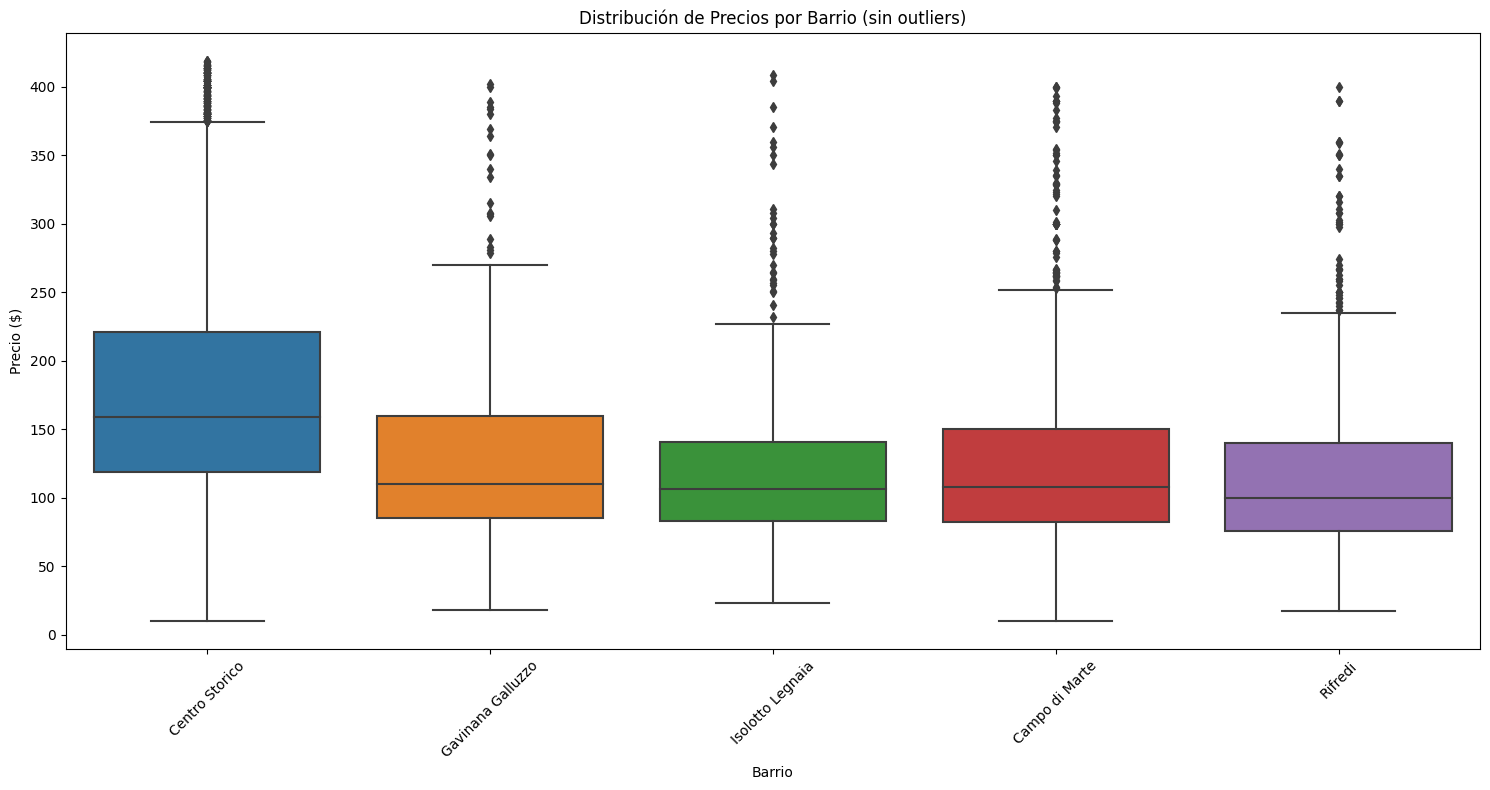

In [99]:
# Calcular el rango intercuartílico
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

# Filtrar los outliers
filtered_df = listings_df[listings_df["price_float"] <= (q3 + 1.5 * iqr)].copy()

# Gráfico de cajas sin outliers
plt.figure(figsize=(15, 8))
sns.boxplot(x='neighbourhood_cleansed', y='price_float', data=filtered_df)
plt.title('Distribución de Precios por Barrio (sin outliers)')  
plt.xticks(rotation=45) 
plt.xlabel('Barrio')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()

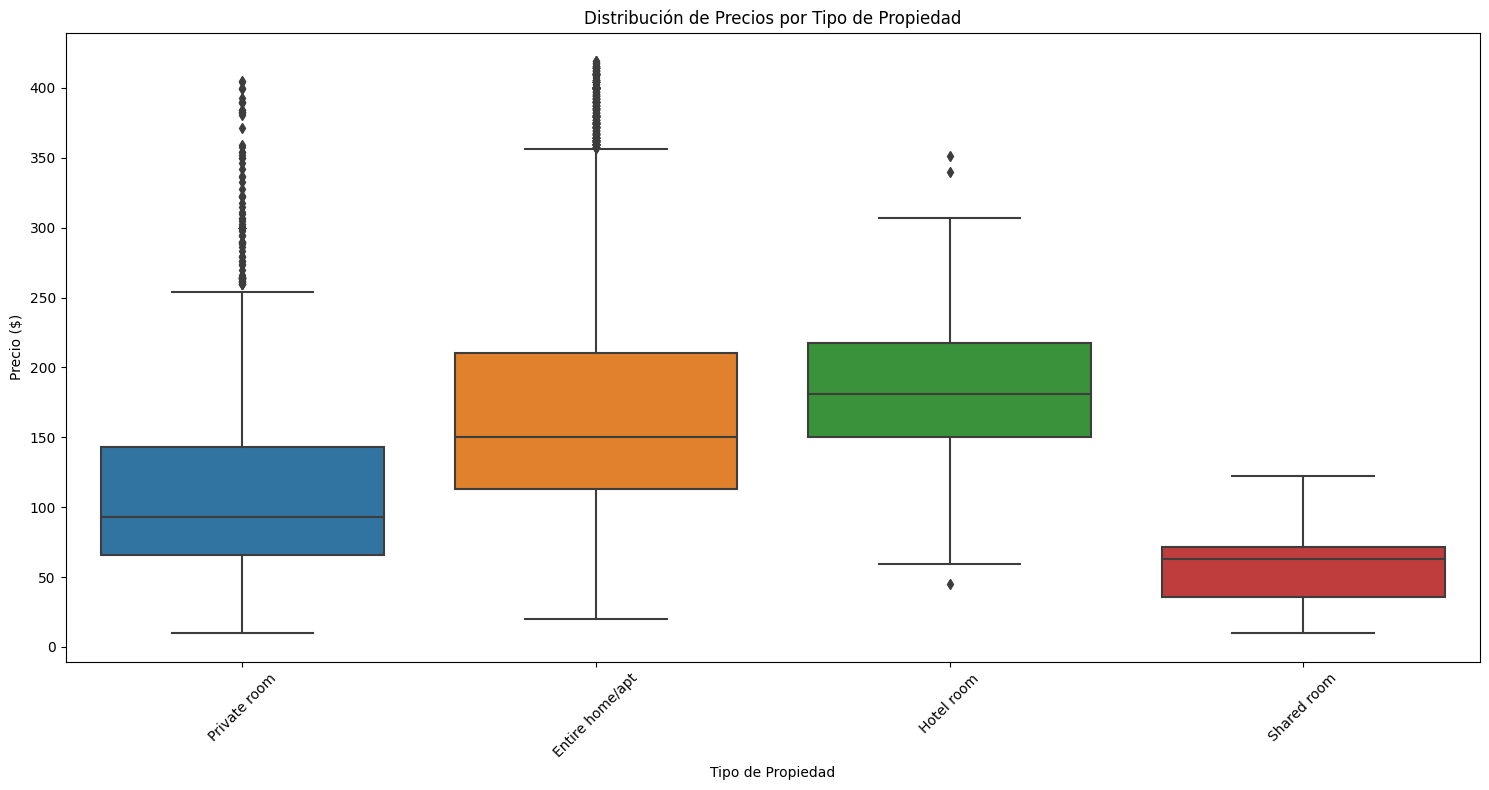

In [102]:
# Crear el diagrama de cajas por tipo de propiedad y precio
plt.figure(figsize=(15, 8))
sns.boxplot(x='room_type', y='price_float', data=filtered_df)
plt.title('Distribución de Precios por Tipo de Propiedad')
plt.xticks(rotation=45) 
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()

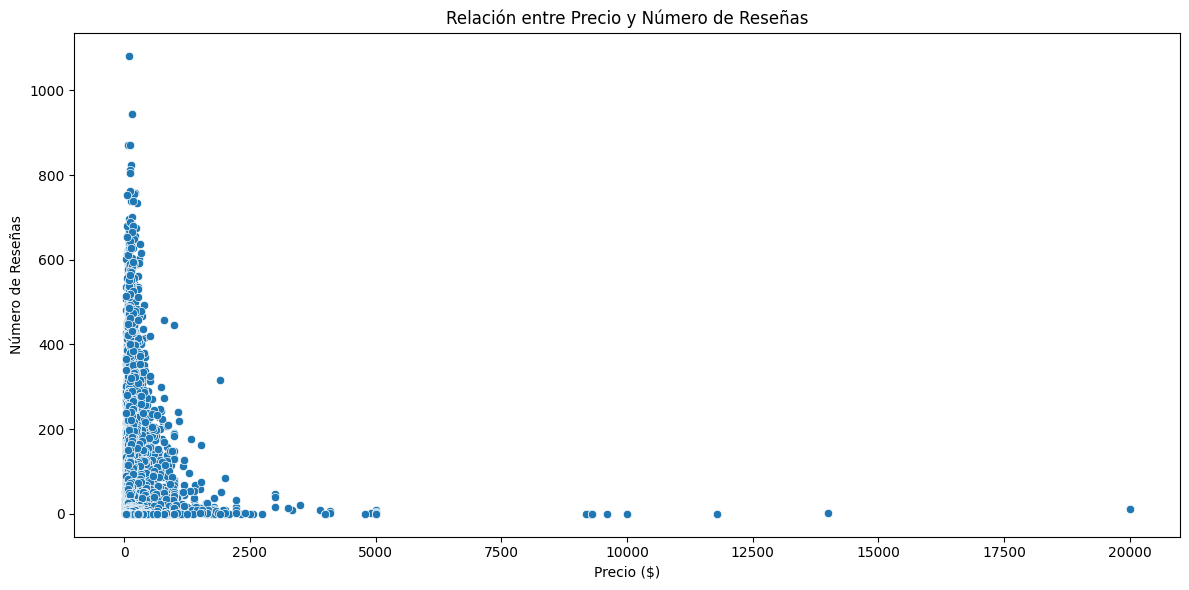

In [105]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price_float', y='number_of_reviews', data=listings_df)
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Precio ($)')
plt.ylabel('Número de Reseñas')
plt.tight_layout()
plt.show()

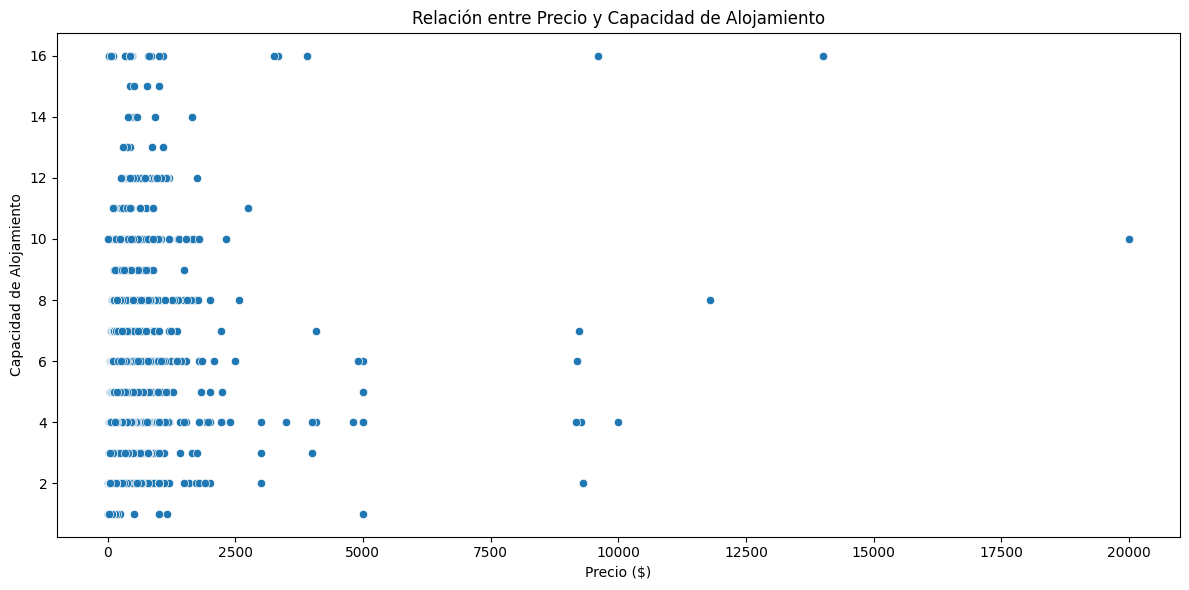

In [107]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price_float', y='accommodates', data=listings_df)
plt.title('Relación entre Precio y Capacidad de Alojamiento')
plt.xlabel('Precio ($)')
plt.ylabel('Capacidad de Alojamiento')
plt.tight_layout()
plt.show()

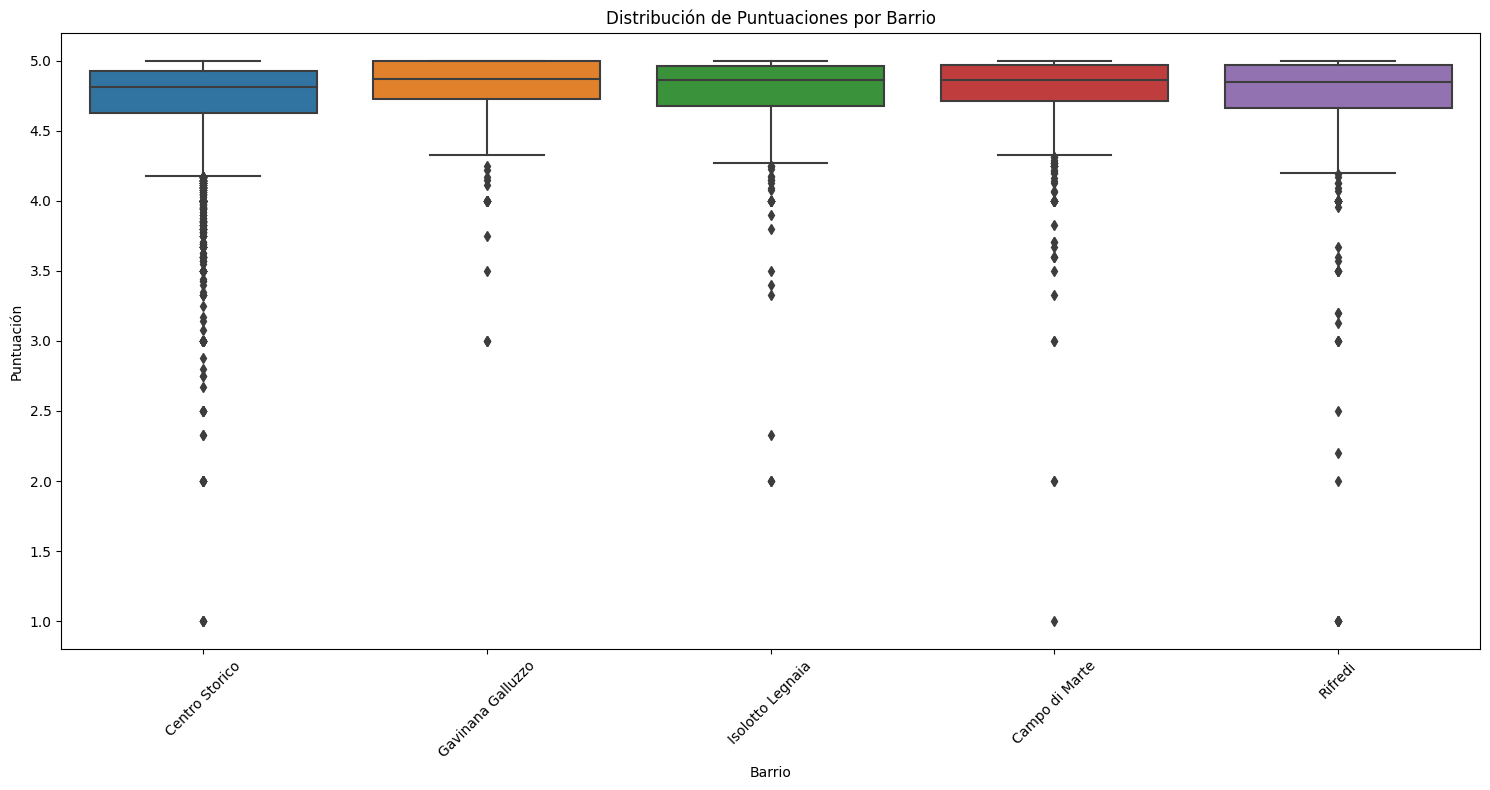

In [108]:
# Ver relación entre los barrios y las puntuaciones
plt.figure(figsize=(15, 8))
sns.boxplot(x='neighbourhood_cleansed', y='review_scores_rating', data=filtered_df)
plt.title('Distribución de Puntuaciones por Barrio')
plt.xticks(rotation=45)
plt.xlabel('Barrio')
plt.ylabel('Puntuación')
plt.tight_layout()
plt.show()

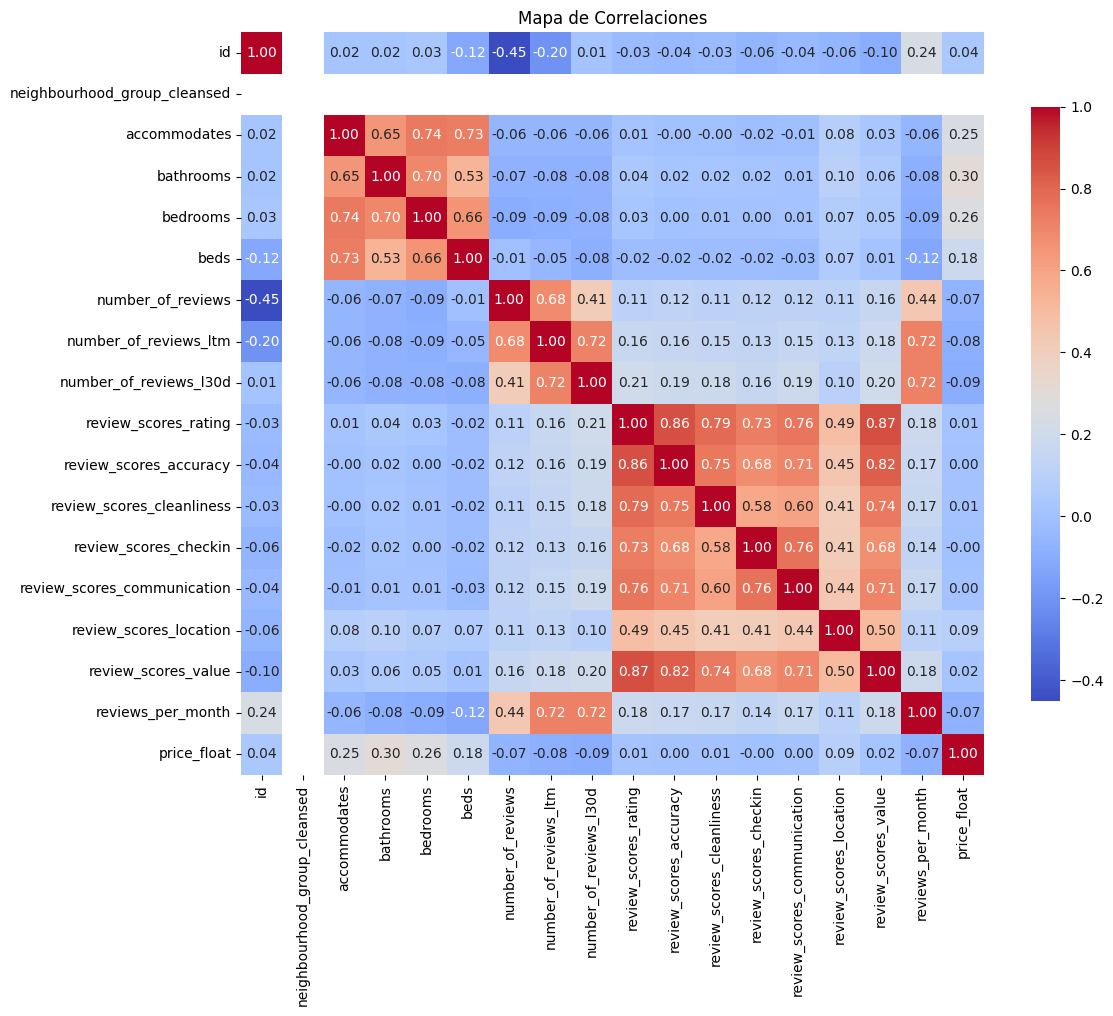

In [106]:
numeric_df = listings_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Correlaciones')
plt.tight_layout()
plt.show()

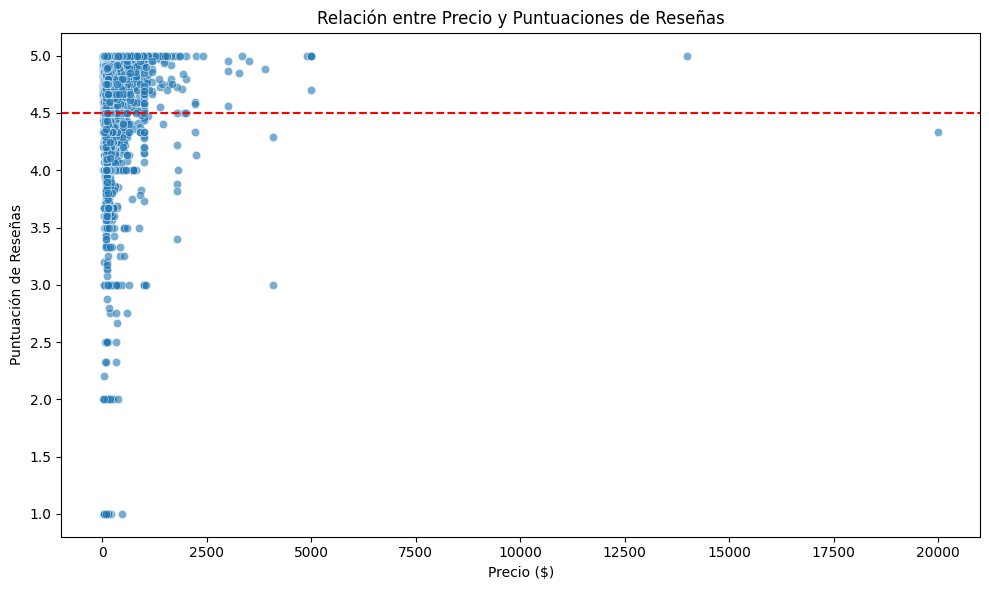

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_float', y='review_scores_rating', data=listings_df, alpha=0.6)
plt.title('Relación entre Precio y Puntuaciones de Reseñas')
plt.xlabel('Precio ($)')
plt.ylabel('Puntuación de Reseñas')
plt.axhline(y=4.5, color='r', linestyle='--') 
plt.tight_layout()
plt.show()

In [115]:
mean_scores_by_neighbourhood = listings_df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()

top_3_neighbourhoods = mean_scores_by_neighbourhood.nlargest(3, 'review_scores_rating')

print(top_3_neighbourhoods)

  neighbourhood_cleansed  review_scores_rating
2      Gavinana Galluzzo              4.789874
0         Campo di Marte              4.788296
3       Isolotto Legnaia              4.757996


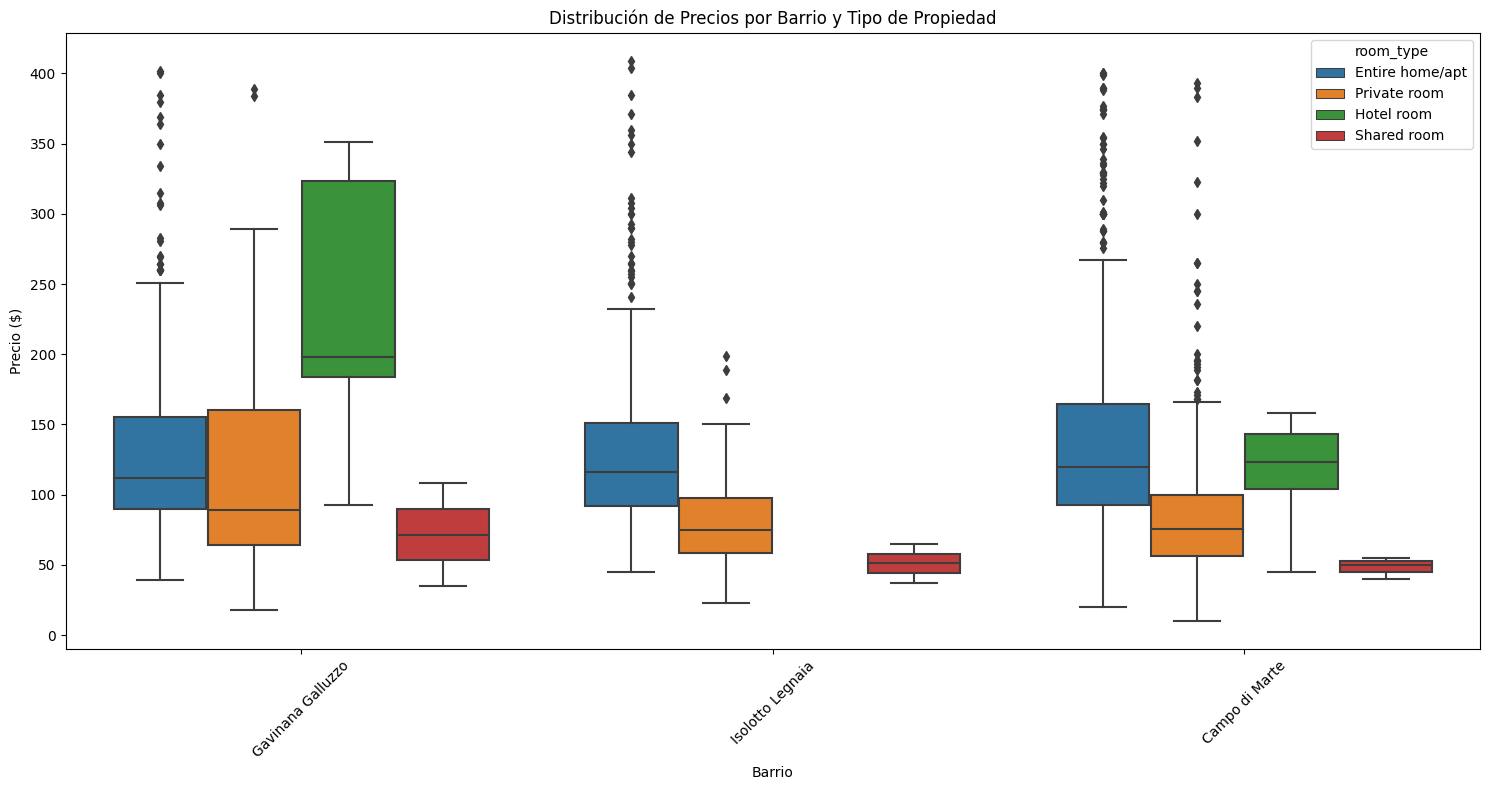

In [119]:
# Relación entre el tipo de propiedad y los barrios solo para los 3 barrios con mayor puntuación

top_neighbourhoods = top_3_neighbourhoods['neighbourhood_cleansed'].tolist()

top_neighbourhoods_df = filtered_df[filtered_df['neighbourhood_cleansed'].isin(top_neighbourhoods)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='neighbourhood_cleansed', y='price_float', hue='room_type', data=top_neighbourhoods_df)
plt.title('Distribución de Precios por Barrio y Tipo de Propiedad')
plt.xticks(rotation=45)
plt.xlabel('Barrio')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()

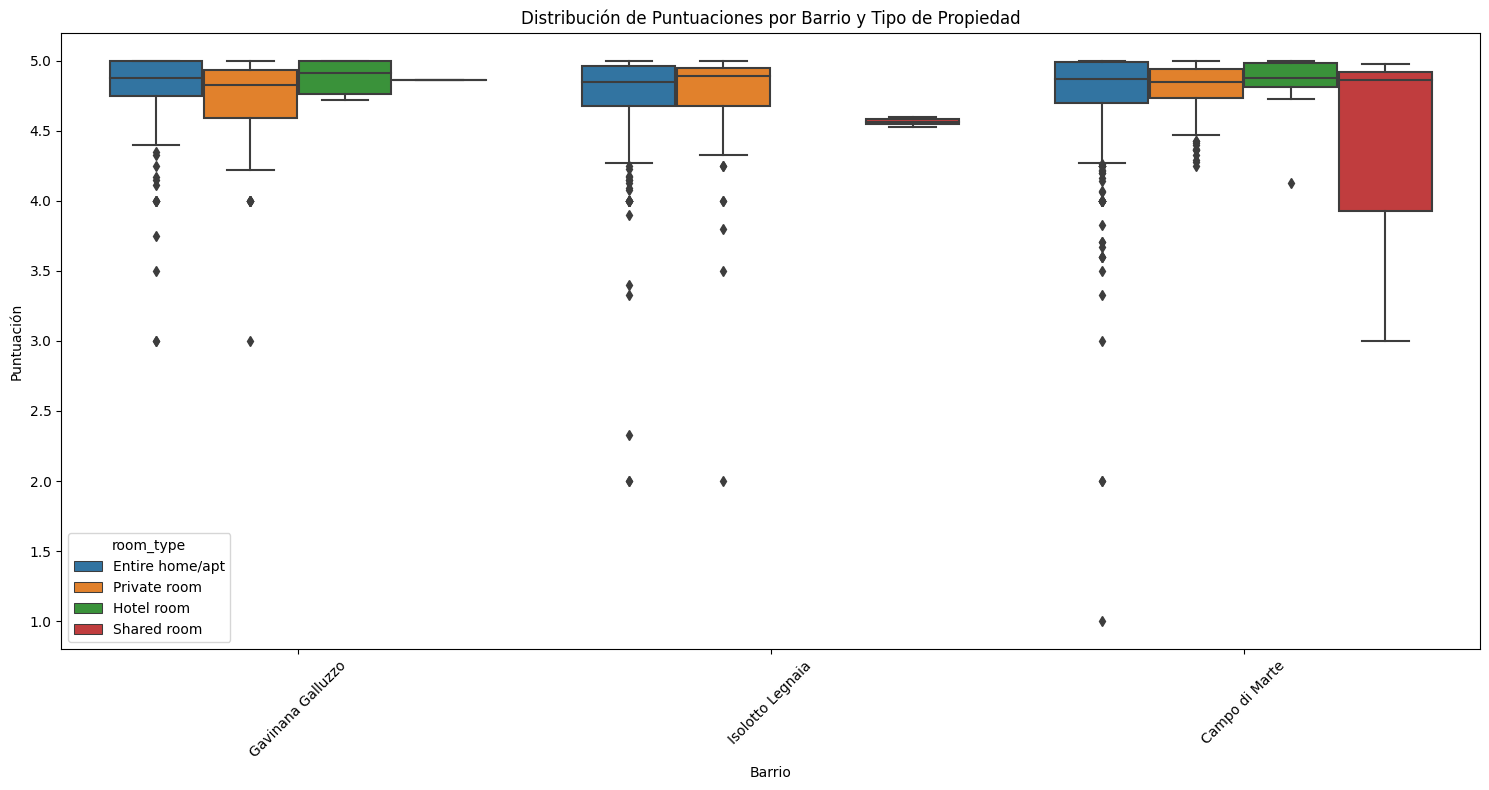

In [120]:
# Distribución de puntuaciones por tipo de propiedad y barrio
plt.figure(figsize=(15, 8))
sns.boxplot(x='neighbourhood_cleansed', y='review_scores_rating', hue='room_type', data=top_neighbourhoods_df)
plt.title('Distribución de Puntuaciones por Barrio y Tipo de Propiedad')
plt.xticks(rotation=45)
plt.xlabel('Barrio')
plt.ylabel('Puntuación')
plt.tight_layout()
plt.show()

## Insights
 - La puntuación general de reseñas (review_scores_rating) tiene una correlación muy baja (0.013) con el precio (price_float), lo que sugiere que la calidad de las reseñas no está directamente relacionada con el precio de las propiedades. Esto podría indicar que los precios no siempre reflejan la satisfacción del cliente.

- Existe una correlación positiva fuerte entre el número de reseñas (number_of_reviews) y el número de reseñas a largo plazo (number_of_reviews_ltm) y a 30 días (number_of_reviews_l30d). Esto indica que propiedades con más reseñas tienden a seguir recibiendo más reseñas, lo cual es un buen indicador de popularidad y ocupación.

- La cantidad de accommodates, bedrooms y bathrooms están positivamente correlacionadas entre sí, lo que es lógico, ya que propiedades más grandes generalmente tienen más habitaciones y baños.

- El número de camas (beds) tiene una correlación negativa con las puntuaciones de reseñas, lo que puede indicar que, en algunas circunstancias, propiedades más grandes no necesariamente ofrecen una mejor experiencia al cliente.

- Los 3 barrios con mejores reseñas son: Campo di Marte, Gavinana-Galluzzo y Isolotto Legnaia. Esto podría indicar que estas áreas son más populares y ofrecen una mejor experiencia al cliente. 

- Los tipos de propiedad con mejores reseñas son: Entire home/apt, Private room y Hotel room. Esto sugiere que los clientes prefieren estos tipos de propiedades y que los propietarios podrían beneficiarse de ofrecer más propiedades de estos tipos.

- Los precios más altos se encuentran en las propiedades de tipo Entire home/apt y Hotel room, lo que sugiere que estos tipos de propiedades son más rentables.

